In [1]:
from shapely.ops import linemerge
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from shapely.geometry import LineString, Point

from utils import print_graph_info
from railroad import save_graph

np.random.seed(42)

In [2]:
def check_unique_combinations(df, columns):
    """
    Checks if the combinations of the specified columns are unique in the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame to check.
        columns (list): List of columns to combine and check for uniqueness.

    Returns:
        bool: True if unique, False otherwise.
    """
    # Create a set of tuples from the specified columns
    unique_combinations = set(tuple(row)
                              for row in df[columns].to_records(index=False))

    # Check if the number of unique combinations matches the number of rows in the DataFrame
    is_unique = len(unique_combinations) == len(df)

    if not is_unique:
        print("Duplicate combinations found!")
        duplicates = df[df.duplicated(subset=columns, keep=False)]
        print(duplicates)
    else:
        print("All combinations are unique.")

    return is_unique

In [3]:
data_df = pd.read_csv('../data/intersections.csv')
data_df['theta'] = np.nan
data_df['centerx'] = np.nan
data_df['centery'] = np.nan
data_df['radius'] = np.infty
data_df['nn_id'] = np.nan
data_df['id'] = np.nan
data_df['original_id'] = data_df.index
data_insert_df = pd.read_csv('../data/intersection_radii.csv')
# data_df['turn_allowed'] = data_df['radius'] > 10.0

print(len(data_df))

# data['turn_allowed'] = np.random.choice(
#     [True, True], size=len(data))

display(data_df)
display(data_insert_df)

70063


,origin_id,neighbor_1_id,neighbor_2_id,origin_x,origin_y,neighbor_1_x,neighbor_1_y,neighbor_2_x,neighbor_2_y,theta,centerx,centery,radius,nn_id,id,original_id
0,12339218091,12339218092,12339218098,-21.937473,64.067271,-21.937536,64.067279,-21.937682,64.067524,NaN,NaN,NaN,inf,NaN,NaN,0
1,12339218091,12339218092,12339218194,-21.937473,64.067271,-21.937536,64.067279,-21.937408,64.067258,NaN,NaN,NaN,inf,NaN,NaN,1
2,12339218091,12339218098,12339218194,-21.937473,64.067271,-21.937682,64.067524,-21.937408,64.067258,NaN,NaN,NaN,inf,NaN,NaN,2
3,12339218092,12339218091,12339218093,-21.937536,64.067279,-21.937473,64.067271,-21.937600,64.067284,NaN,NaN,NaN,inf,NaN,NaN,3
4,12339218093,12339218092,12339218094,-21.937600,64.067284,-21.937536,64.067279,-21.937665,64.067284,NaN,NaN,NaN,inf,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70058,12339218090,12339218087,6287414312,-21.920373,64.087895,-21.920482,64.087830,-21.920541,64.087944,NaN,NaN,NaN,inf,NaN,NaN,70058
70059,12339279699,12339279698,12339279700,-21.920316,64.087780,-21.920482,64.087830,-21.920077,64.087711,NaN,NaN,NaN,inf,NaN,NaN,70059
70060,12339279700,12339279699,12339279701,-21.920077,64.087711,-21.920316,64.087780,-21.918794,64.087338,NaN,NaN,NaN,inf,NaN,NaN,70060
70061,12339279701,12339257615,12339279700,-21.918794,64.087338,-21.916906,64.086787,-21.920077,64.087711,NaN,NaN,NaN,inf,NaN,NaN,70061


,id,origin_id,neighbor_1_id,neighbor_2_id,origin_x,origin_y,neighbor_1_x,neighbor_1_y,neighbor_2_x,neighbor_2_y,theta,radius,centerx,centery,nn_id
0,0,12339218091,12339218092,12339218098,-21.937473,64.067271,-21.937536,64.067279,-21.937682,64.067524,43.048941,inf,inf,inf,NaN
1,1,12339218091,12339218098,12339218194,-21.937473,64.067271,-21.937682,64.067524,-21.937408,64.067258,141.298965,inf,inf,inf,NaN
2,2,12339218097,12339218096,12339267993,-21.937852,64.067260,-21.937792,64.067272,-21.937850,64.067404,78.209338,inf,inf,inf,NaN
3,3,12339218097,12339218111,12339267993,-21.937852,64.067260,-21.937926,64.067238,-21.937850,64.067404,107.174688,inf,inf,inf,NaN
4,4,12339218102,12339218101,12339267973,-21.939357,64.073085,-21.938492,64.070239,-21.939321,64.073306,153.929532,inf,inf,inf,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14604,14400,9527191526,9910588366,7734666414,-21.921502,64.114399,-21.921508,64.114448,-21.921338,64.114406,95.650905,inf,inf,inf,NaN
14605,14401,12339278582,12339278581,12339278583,-22.010343,64.103811,-22.009806,64.103807,-22.010354,64.103611,92.677598,inf,inf,inf,NaN
14606,14402,12339278583,12339278582,12339278584,-22.010354,64.103611,-22.010343,64.103811,-22.011273,64.103618,92.703687,inf,inf,inf,NaN
14607,14403,12339278592,12339278591,12339278593,-21.890837,64.146663,-21.890848,64.146624,-21.890806,64.146697,153.545297,0.257299,-22.122238,64.274388,"('way', 850645191)"


In [4]:
columns_to_check = ['origin_id', 'neighbor_1_id', 'neighbor_2_id']
check_unique_combinations(data_df, columns_to_check)
check_unique_combinations(data_insert_df, columns_to_check)

All combinations are unique.
All combinations are unique.


True

In [5]:
# Find the indices in data_df that match the rows in data_insert_df
merged_df = data_df.merge(
    data_insert_df[['origin_id', 'neighbor_1_id', 'neighbor_2_id']],
    on=['origin_id', 'neighbor_1_id', 'neighbor_2_id'],
    how='inner'
)
len(merged_df)

matching_indices_list = list(merged_df['original_id'].values)


print(f"Number of matching indices: {len(matching_indices_list)}")
print(f"Matching indices max: {max(matching_indices_list)}")

Number of matching indices: 14609
Matching indices max: 70038


In [6]:
data_insert_df['original_id'] = matching_indices_list

In [7]:
# Check if both dataframes have the same columns
if set(data_df.columns) == set(data_insert_df.columns):
    print("Both dataframes have the same columns.")
else:
    print("The dataframes have different columns.")
    # Show the difference if the dataframes have different columns
    if set(data_df.columns) != set(data_insert_df.columns):
        diff_columns = set(data_df.columns).symmetric_difference(
            set(data_insert_df.columns))
        print("Different columns:", diff_columns)

data_insert_df = data_insert_df[data_df.columns]

Both dataframes have the same columns.


In [8]:
# Ensure 'original_id' is present in data_insert_df
if 'original_id' not in data_insert_df.columns:
    raise ValueError("data_insert_df must have an 'original_id' column.")

# Create a copy of the original DataFrame
updated_df = data_df.copy()

# Replace rows in the copied DataFrame with rows from data_insert_df
updated_df.loc[data_insert_df['original_id'], :] = data_insert_df.values

# Validate the operation
print("Rows replaced successfully in updated_df.")

Rows replaced successfully in updated_df.


/tmp/ipykernel_22531/3239766123.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, "('way', 106717504)", nan, "('way', 516202862)", nan, "('way', 1011004947)", "('way', 91910983)", nan, nan, nan, nan, nan, nan, "('way', 106473561)", nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, "('way', 110752264)", "('way', 101370238)", nan, "('way', 110752273)", nan, nan, "('way', 225569481)", "('way', 107649894)", "('way', 107649894)", nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, "('way', 133751771)", "('way', 133751791)", "('way', 1032712788)", "('way', 113578858)", "('way', 113578842)", "('way', 113578853)", "('way', 1242326293)",

In [9]:
print(f'{len(data_df) = }')
print(f'{len(data_insert_df) = }')
print(f'{len(updated_df) = }')

len(data_df) = 70063
len(data_insert_df) = 14609
len(updated_df) = 70063


In [10]:
data_df = updated_df
display(data_df)

,origin_id,neighbor_1_id,neighbor_2_id,origin_x,origin_y,neighbor_1_x,neighbor_1_y,neighbor_2_x,neighbor_2_y,theta,centerx,centery,radius,nn_id,id,original_id
0,12339218091,12339218092,12339218098,-21.937473,64.067271,-21.937536,64.067279,-21.937682,64.067524,43.048941,inf,inf,inf,NaN,0.0,0
1,12339218091,12339218092,12339218194,-21.937473,64.067271,-21.937536,64.067279,-21.937408,64.067258,NaN,NaN,NaN,inf,NaN,NaN,1
2,12339218091,12339218098,12339218194,-21.937473,64.067271,-21.937682,64.067524,-21.937408,64.067258,141.298965,inf,inf,inf,NaN,1.0,2
3,12339218092,12339218091,12339218093,-21.937536,64.067279,-21.937473,64.067271,-21.937600,64.067284,NaN,NaN,NaN,inf,NaN,NaN,3
4,12339218093,12339218092,12339218094,-21.937600,64.067284,-21.937536,64.067279,-21.937665,64.067284,NaN,NaN,NaN,inf,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70058,12339218090,12339218087,6287414312,-21.920373,64.087895,-21.920482,64.087830,-21.920541,64.087944,NaN,NaN,NaN,inf,NaN,NaN,70058
70059,12339279699,12339279698,12339279700,-21.920316,64.087780,-21.920482,64.087830,-21.920077,64.087711,NaN,NaN,NaN,inf,NaN,NaN,70059
70060,12339279700,12339279699,12339279701,-21.920077,64.087711,-21.920316,64.087780,-21.918794,64.087338,NaN,NaN,NaN,inf,NaN,NaN,70060
70061,12339279701,12339257615,12339279700,-21.918794,64.087338,-21.916906,64.086787,-21.920077,64.087711,NaN,NaN,NaN,inf,NaN,NaN,70061


In [11]:
data_df['radius'] = data_df['radius'] * 1000

In [12]:
unique_origin_ids = data_df['origin_id'].nunique()
print(f'Number of unique origin_id values: {unique_origin_ids}')

Number of unique origin_id values: 59754


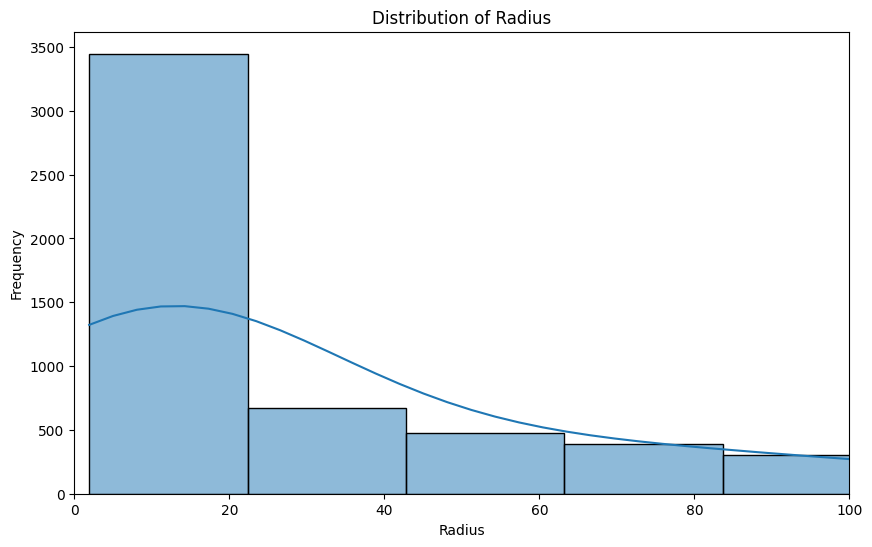

In [13]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data_df['radius'], bins=30, kde=True, )
plt.title('Distribution of Radius')
plt.xlabel('Radius')
plt.xlim(0, 100)
plt.ylabel('Frequency')
plt.show()

In [14]:
data_df['turn_allowed'] = data_df['radius'] > 10.0
turn_allowed_stats = data_df['turn_allowed'].value_counts()
print(turn_allowed_stats)

turn_allowed
True     67710
False     2353
Name: count, dtype: int64


In [15]:
display(data_df[data_df['radius'] < 100])

,origin_id,neighbor_1_id,neighbor_2_id,origin_x,origin_y,neighbor_1_x,neighbor_1_y,neighbor_2_x,neighbor_2_y,theta,centerx,centery,radius,nn_id,id,original_id,turn_allowed
177,12339218227,12339218226,12339218228,-21.774875,64.104960,-21.774977,64.105030,-21.774804,64.104861,159.960773,-21.754061,64.126115,29.225320,"('way', 516202862)",38.0,177,True
253,12339218288,12339218287,12339226854,-21.827547,64.123316,-21.827776,64.123449,-21.827504,64.123256,156.083933,-21.823909,64.127328,5.298676,"('way', 106473561)",48.0,253,False
398,14586813,1243941094,1229772433,-21.900033,64.129002,-21.900196,64.128979,-21.900036,64.128920,79.983246,-21.889286,64.140955,10.330007,"('way', 110752264)",70.0,398,True
400,12339218398,12339218399,12339264858,-21.900033,64.129002,-21.900036,64.129063,-21.899952,64.129005,91.210392,-21.919356,64.107736,20.530941,"('way', 101370238)",71.0,400,True
437,12339218427,12339218426,12339218428,-21.759865,64.131897,-21.759907,64.132005,-21.759878,64.131837,146.004209,-21.690673,64.137220,66.364708,"('way', 225569481)",76.0,437,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69664,12339279403,12339279392,12339279404,-21.805968,64.153802,-21.805846,64.154283,-21.806061,64.153763,126.581229,-21.741788,64.098296,75.798748,"('way', 1227361692)",14543.0,69664,True
69693,11544687138,633181055,11544687139,-21.933510,64.135331,-21.933448,64.135221,-21.933410,64.135310,48.608049,-21.941042,64.140870,3.847687,"('way', 849191531)",14552.0,69693,False
69694,12339279499,12339279498,12339279500,-21.735664,64.137748,-21.736152,64.137837,-21.735699,64.137711,56.719222,-21.718203,64.143448,8.724753,"('way', 1070708223)",14553.0,69694,False
69695,12339279500,12339279499,12339279501,-21.735699,64.137711,-21.735664,64.137748,-21.734973,64.137583,56.458019,-21.744520,64.134810,4.392039,"('way', 1070708215)",14554.0,69695,False


In [16]:
y_min, x_min = 64.14, -21.97
y_max, x_max = 64.15, -21.95

sample_data_df = data_df[
    (data_df['origin_x'] > x_min) & (data_df['origin_x'] < x_max) &
    (data_df['origin_y'] > y_min) & (data_df['origin_y'] < y_max)
]
print(len(sample_data_df))

939


In [17]:
sample_data_df.to_csv('../data/intersections_test.csv', index=False)

In [18]:
main_df = data_df

In [19]:
print(f"{main_df['origin_x'].min() = }")
print(f"{main_df['origin_x'].max() = }")
print(f"{main_df['origin_y'].min() = }")
print(f"{main_df['origin_y'].max() = }")
print(f"{main_df['neighbor_1_x'].min() = }")
print(f"{main_df['neighbor_1_x'].max() = }")
print(f"{main_df['neighbor_1_y'].min() = }")
print(f"{main_df['neighbor_1_y'].max() = }")
print(f"{main_df['neighbor_2_x'].min() = }")
print(f"{main_df['neighbor_2_x'].max() = }")
print(f"{main_df['neighbor_2_y'].min() = }")
print(f"{main_df['neighbor_2_y'].max() = }")

main_df['origin_x'].min() = -22.0399665
main_df['origin_x'].max() = -21.6436222
main_df['origin_y'].min() = 64.0347369
main_df['origin_y'].max() = 64.1876389
main_df['neighbor_1_x'].min() = -22.0399665
main_df['neighbor_1_x'].max() = -21.6414521
main_df['neighbor_1_y'].min() = 64.0347369
main_df['neighbor_1_y'].max() = 64.1876389
main_df['neighbor_2_x'].min() = -22.0399665
main_df['neighbor_2_x'].max() = -21.6438552
main_df['neighbor_2_y'].min() = 64.0350232
main_df['neighbor_2_y'].max() = 64.1876389


In [20]:
len(set(data_df['origin_id'].values).union(
    set(data_df['neighbor_1_id'].values)).union(set(data_df['neighbor_2_id'].values)))

63979

In [21]:
main_df.to_csv('../data/final_intersections.csv', index=False)